# II. End to End Machine Learning Project

Follow along!! This is as basic stuff as it gets. A nice refresher on basic pandas manipulation, and how to conduct a ML project.

The goal here is to predict the median house value of each block in California, based on data available regarding the housing in the state. 

The dataset used is based on the **California Housing Prices** from StatLib.

### Setup

#### Downloading the data

Download the ``housing.tgz`` file from the data repo.

In [29]:
from pathlib import Path
import pandas as pd
import tarfile

def load_housing_data():
    tarball_path = Path("../data/housing/housing.tgz")
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="../data/")
    return pd.read_csv(Path("../data/housing/housing.csv"))

housing = load_housing_data()

#### Formatting the graphs

If some of the graphs don't display beautifully, change some values accordingly.

In [30]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

## Exploratory Data Analysis

### First steps

Gotta start with the most basic views. First, a quick glance at the dataframe's head (you could look at the tail if you're edgy)

In [31]:
display(housing.head())
# display(housing.tail())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We get an idea of how the DataFrame looks like. To have a more rigorous display, use ``info()``:

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


First is described how many entries are in the DataFrame (as well as how they are indexed). Then, every column has its name detailed, along with its non-null values count, and its data type.
For instance, `longitude` is a numerical variable with no missing value, whereas `ocean_proximity` is a categorical variable. 

It seems that `total_bedrooms` is the only variable that contains missing entries. There are multiple ways to show this.

In [33]:
print(housing.isna().sum())
print(f"housing has {housing.isna().sum().sum()} missing values, housing.total_bedrooms has {housing.total_bedrooms.isna().sum()} missing values")

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
housing has 207 missing values, housing.total_bedrooms has 207 missing values


We'll deal with these missing values later. For now let's continue the EDA. For numerical variables, the ``describe()`` method yields the basic statistics associated:

In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Looking back on `ocean_proximity` (the only categorical variable here), we can do a ``value_counts()`` to check its categories.

In [35]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Continuing with the numerical variables, we can plot each histogram with ``hist()``:

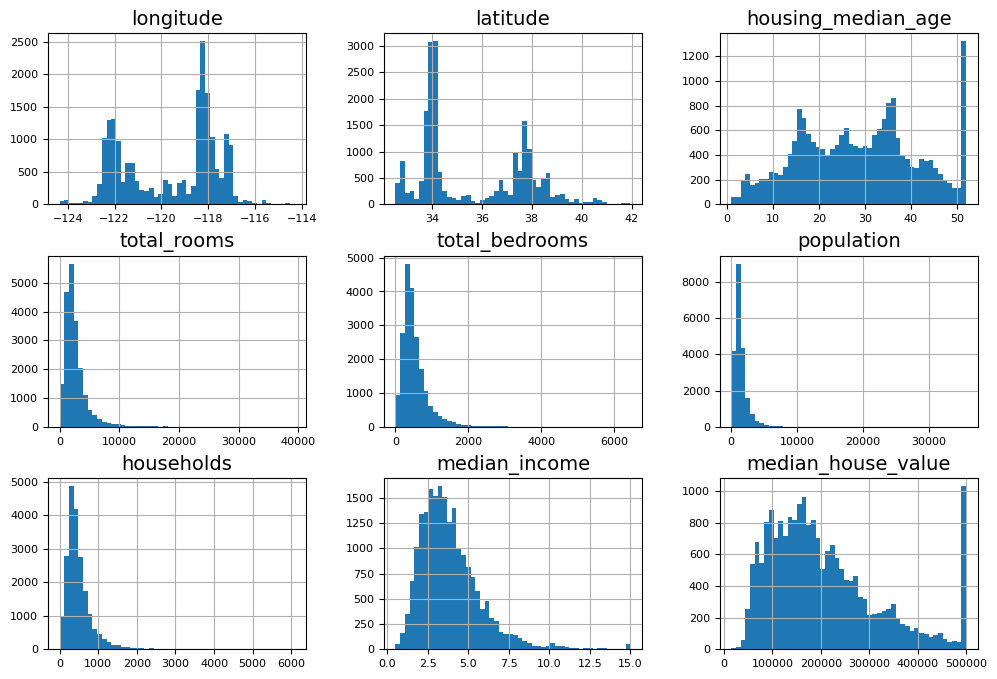

In [36]:
housing.hist(bins = 50, figsize = (12, 8)) # Can play around with the number of bins
plt.show()

Things to notice: 

* ``median_income``'s unit is most likely (*spoiler: it is*) 10 000 USD per year. It is capped at 0.5k (resp. 15k) for the lowest (resp. highest) median incomes.
* ``housing_median_age`` and ``median_house_value`` have also been capped. This is an issue since it affects our target variable. 
* The scales vary drastically. 
* Some distributions are highly asymmetrical $-$ we'd like to transform them into bell curves.

### Creating a Test Set

#### Creating it by ourselves (optional)

Let's first build it using ``numpy``:

In [37]:
import numpy as np

def split_train_test(data, test_ratio = 0.2): 
    shuffled_idx = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_idx  = shuffled_idx[:test_size]
    train_idx = shuffled_idx[test_size:]
    return data.iloc[train_idx], data.iloc[test_idx]

In [38]:
train_set, test_set = split_train_test(housing, 0.2)
print(f"Total set size: {len(housing)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16512    Test set size: 4128


Not optimal though, since running the cell yields a different test set each time. To address this issue, we could use a hash function that remains stable during each execution:

In [39]:
from zlib import crc32

def test_set_check(id, test_ratio):
    return crc32(np.int64(id)) < test_ratio * 2**32

def split_train_test_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [40]:
housing_with_id = housing.reset_index() # housing doesn't have an index column so we have to add it manually
train_set, test_set = split_train_test_id_hash(housing_with_id, 0.2, "index")
print(f"Total set size: {len(housing_with_id)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16512    Test set size: 4128


Using the default index as an identifier is a great start, but it lacks robustness. We could construct an ID off stable, existing columns such as longitude and latitude, ensuring uniqueness:

In [41]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_id_hash(housing_with_id, 0.2, "id")
print(f"Total set size: {len(housing_with_id)}    Train set size: {len(train_set)}    Test set size: {len(test_set)}")

Total set size: 20640    Train set size: 16322    Test set size: 4318


#### Using Scikit-Learn

Obviously, Scikit-Learn has some neat built-in components to split datasets. ``train_test_split()`` is the basic function that achieves this. (``random_state`` is set here for reproducibility)

In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 1234)

If the dataset is sufficiently large (typically when there are way more observations than there are variables), we can move on. Otherwise we might introduce sample bias. In this case, consider **stratified sampling** instead. 

*See annex 1.*

Suppose that median_income is actually an important feature to predict median house values. We have to ensure that all kinds of median incomes are represented in our dataset. First, we need to categorize the variable using ``pd.cut()``:

In [54]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

A quick look at the histogram of ``income_cat`` shows that the values are not uniformly distributed across the bins.

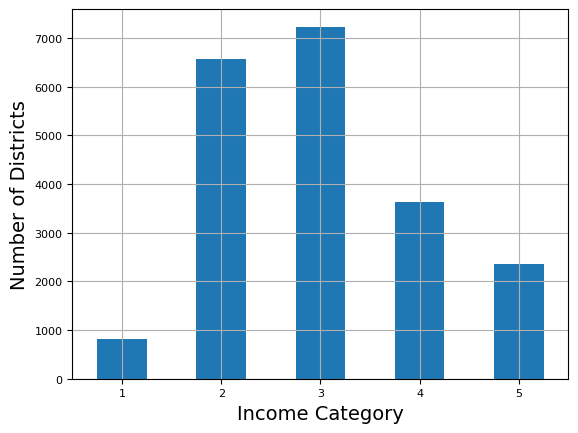

In [59]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
# housing["income_cat"].hist() also works
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

Next, we'll use the ``StratifiedShuffleSplit`` function. This generates a "splitter", which in turn creates stratified samples of our dataset. We can verify it by printing the ratio of each sample based on ``income_cat``:

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
for train_idx, test_idx in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_idx]
    strat_test_set_n = housing.iloc[test_idx]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0] # Can use other indices (there are n_splits different folds)

# We can do this more easily and without using StratifiedShuffleSplit, since tts has a nice argument stratify: 
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing["income_cat"])

print(f"Stratified test set:\n{strat_test_set['income_cat'].value_counts(normalize = True)}")
#print(strat_train_set["income_cat"].value_counts(normalize = True))

print(f"Full dataset:\n{housing['income_cat'].value_counts(normalize = True)}") # Roughly the same

# For the sake of comparison: see how a normal train_test_split behaves

normal_train_set, normal_test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Using train_test_split without stratify:\n{normal_test_set['income_cat'].value_counts(normalize = True)}")


Stratified test set:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64
Full dataset:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64
Using train_test_split without stratify:
income_cat
3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: proportion, dtype: float64


Below is the comparison table.

In [111]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts(normalize = True)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(normal_test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Don't forget to drop ``income_cat`` afterwards to return the datasets to their original forms.

In [112]:
for set_ in (strat_train_set, strat_test_set):
    set_ = set_.drop("income_cat", axis = 1)

### Data Visualization and Correlation Search

In [115]:
housing = strat_train_set.copy() # We set aside the test set. 

#### Visualizing Geographical Data 

``longitude`` and ``latitude`` can be plotted together to obtain the 2D representation of housing blocks across California:

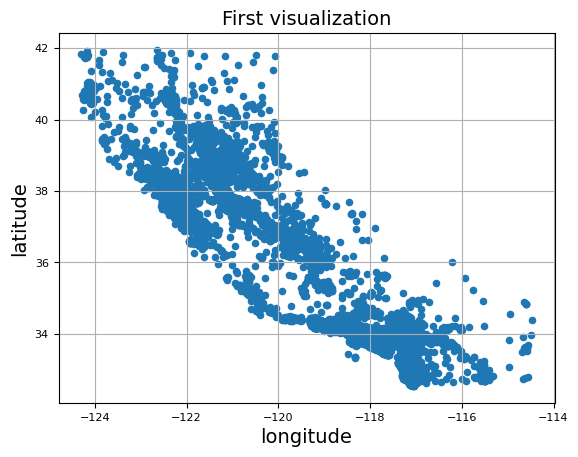

In [119]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True)
plt.title("First visualization")
plt.show()

This visualization can be improved in many ways. First, set the ``alpha`` parameter such that high density areas are highlighted: 

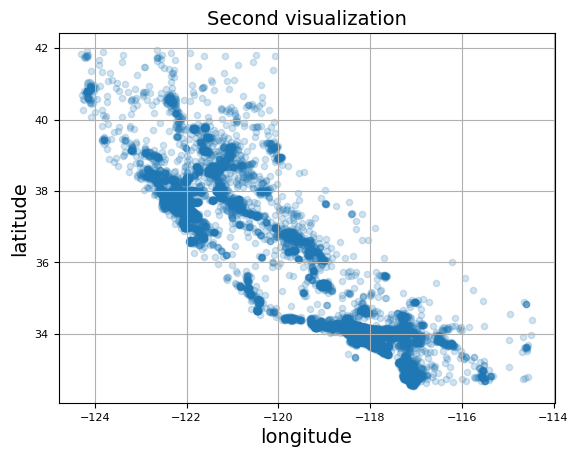

In [120]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, alpha = 0.2)
plt.title("Second visualization")
plt.show()

High density areas are indeed located around San Francisco, LA and San Diego, or near Sacramento and Fresno. 
We can go a step beyond by correlating dot sizes with their respective populations. Also, we can color data based on the median house value: 

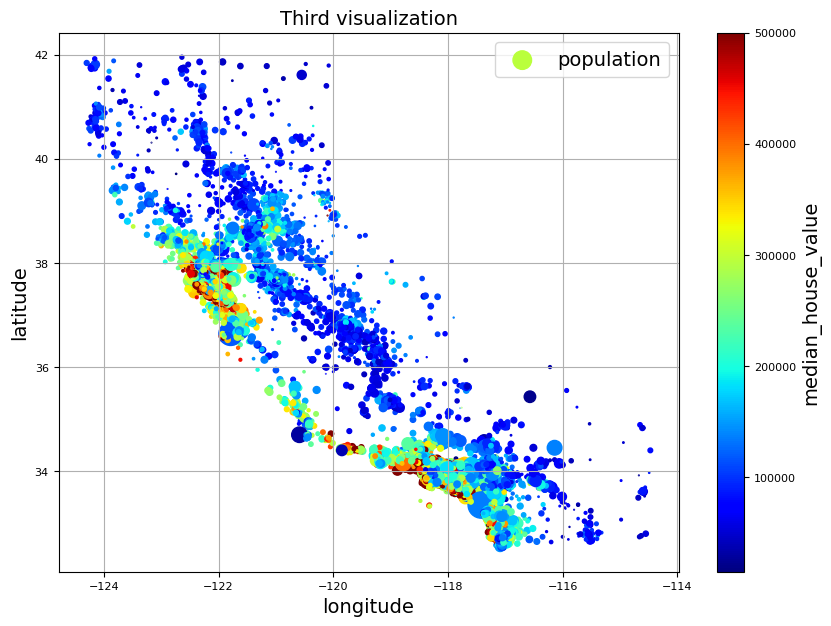

In [142]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True, 
             s = housing["population"] / 100, label = "population", figsize = (10, 7),
             c = "median_house_value", cmap = "jet")
plt.title("Third visualization")
plt.show()

Finally, we can layer this graph on top of an image of California!

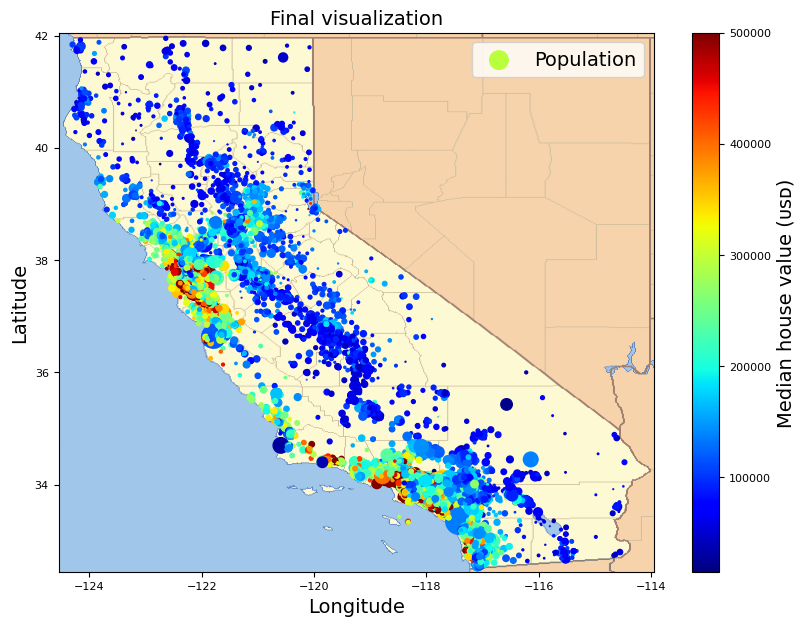

In [152]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread("../data/housing/california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.title("Final visualization")
plt.imshow(california_img, extent=axis)
plt.show()

#### Looking for Correlations

Now, let's compute the correlation matrix of our dataset using ``corr()``. We must set ``numeric_only`` to ``True`` to ensure that categorical variables are omitted, otherwise the method throws an error.

In [157]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688345
total_rooms           0.132975
housing_median_age    0.108184
households            0.068210
total_bedrooms        0.050480
population           -0.021769
longitude            -0.047458
latitude             -0.143523
Name: median_house_value, dtype: float64

We can also use ``scatter_matrix()`` from pandas to plot every variable pairing possible. We restrict this visualization to the four (*seemingly*) relevant features (with respect to ``median_house_value``):

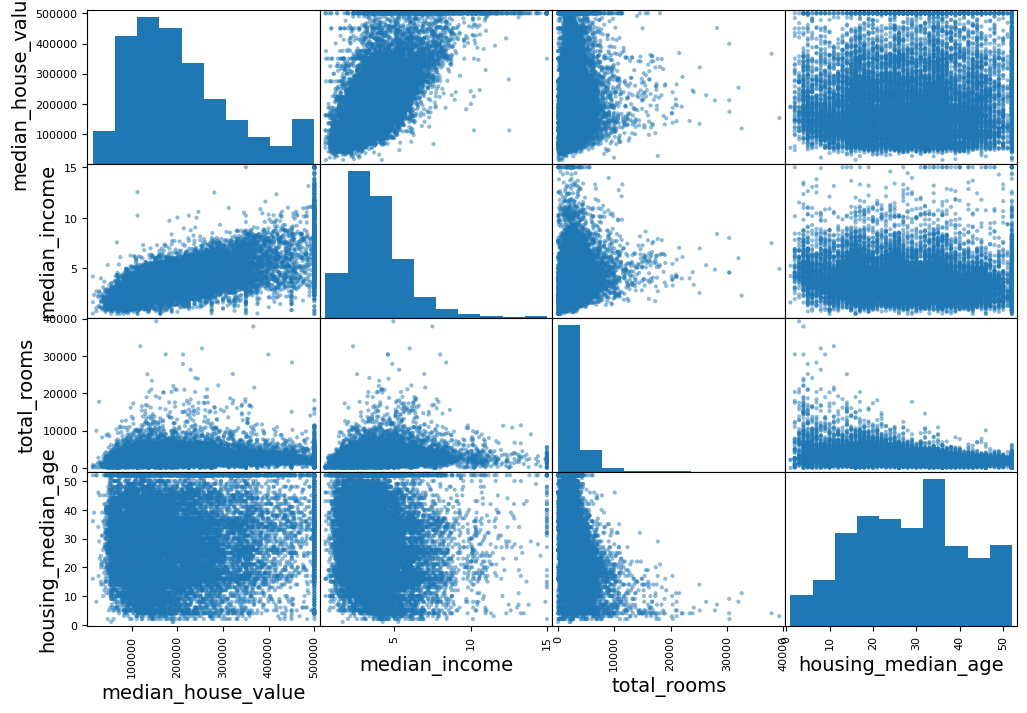

In [160]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show()

We may focus on the only relevant graph here.

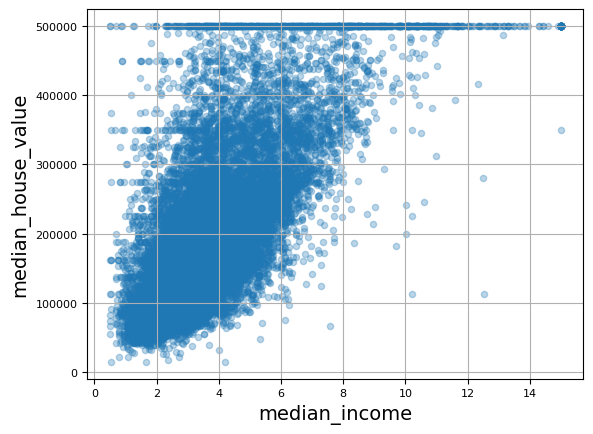

In [165]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.3, grid = True)
plt.show()

There seems to be a strong correlation between the two variables.
Additionnally, we can observe the capping of the variable through the straight line at 500 000$. There are more cappings less visible, happening at around 280 000$, 350 000$, 450 000$ marks.

#### Experimenting with Attribute Combinations

We could try one last transformation in order to find correlations. Let's add three new variables based on existing ones.

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] 
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

By computing the correlation matrix, we see that the variables ``rooms_per_house`` and ``bedrooms_ratio`` both have some correlation to our target variable. 

In [167]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688345
rooms_per_house       0.140807
total_rooms           0.132975
housing_median_age    0.108184
households            0.068210
total_bedrooms        0.050480
population           -0.021769
longitude            -0.047458
people_per_house     -0.094279
latitude             -0.143523
bedrooms_ratio       -0.253167
Name: median_house_value, dtype: float64

## Data Cleaning

We separate the target from the features.

In [171]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Handling Missing Values

#### By hand

There are several options available to deal with missing values. Remember that those values are located on a single variable, namely ``total_bedrooms``.

* Drop any row that contains a missing value
* Drop the variable ``total_bedrooms`` altogether
* Fill the missing values with a convenient placeholder.

In [174]:
nulls_rows_idx = housing.isnull().any(axis = 1)
housing.loc[nulls_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14883,-118.17,34.06,43.0,464.0,NaN,416.0,120.0,2.4750,<1H OCEAN,2
1271,-118.80,34.41,45.0,1610.0,NaN,1148.0,347.0,2.7000,<1H OCEAN,2
19782,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN,4
4991,-118.55,34.28,16.0,8879.0,NaN,3468.0,1200.0,8.1125,<1H OCEAN,5
17708,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,INLAND,4


If you want to experiment on your DataFrame, do it on a copy as to avoid irreversible, unwanted changes on your dataset.

In [190]:
housing_option1 = housing.copy()

housing_option1 = housing_option1.dropna() # NaNs are all on the same variable, there's no need to specify (subset = ["total_bedrooms"])
housing_option1.loc[nulls_rows_idx] # Empty DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [191]:
housing_option2 = housing.copy()
housing_option2 = housing_option2.drop(columns = "total_bedrooms")
housing_option2 = housing_option2.dropna(axis = 1) # NaNs are all on the same variable, so this does the same thing as the line before
housing_option2.loc[nulls_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
14883,-118.17,34.06,43.0,464.0,416.0,120.0,2.4750,<1H OCEAN,2
1271,-118.80,34.41,45.0,1610.0,1148.0,347.0,2.7000,<1H OCEAN,2
19782,-119.75,34.45,6.0,2864.0,1404.0,603.0,5.5073,NEAR OCEAN,4
4991,-118.55,34.28,16.0,8879.0,3468.0,1200.0,8.1125,<1H OCEAN,5
17708,-121.77,39.66,20.0,3759.0,1705.0,600.0,4.7120,INLAND,4


In [192]:
housing_option3 = housing.copy()
housing_option3["total_bedrooms"] = housing_option3["total_bedrooms"].fillna(housing["total_bedrooms"].median())
housing_option3.loc[nulls_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14883,-118.17,34.06,43.0,464.0,435.0,416.0,120.0,2.4750,<1H OCEAN,2
1271,-118.80,34.41,45.0,1610.0,435.0,1148.0,347.0,2.7000,<1H OCEAN,2
19782,-119.75,34.45,6.0,2864.0,435.0,1404.0,603.0,5.5073,NEAR OCEAN,4
4991,-118.55,34.28,16.0,8879.0,435.0,3468.0,1200.0,8.1125,<1H OCEAN,5
17708,-121.77,39.66,20.0,3759.0,435.0,1705.0,600.0,4.7120,INLAND,4


#### Using SimpleImputer

Scikit-Learn has a set of transformers for [missing value imputation](https://scikit-learn.org/stable/api/sklearn.impute.html). The simplest one is the ``SimpleImputer`` class, which supports simple strategies such as median imputation. Like we did with the correlation matrix, we must exclude categorical variables to avoid errors.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
housing_num = housing.select_dtypes(include = [np.number])
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [204]:
print(imputer.statistics_)
print(housing_num.median().values) # This returns the same array as expected.
print(f"Feature names are {imputer.feature_names_in_}, Imputer's strategy is {imputer.strategy}")

[-118.49     34.25     29.     2133.5     435.     1168.      410.
    3.5417]
[-118.49     34.25     29.     2133.5     435.     1168.      410.
    3.5417]
Feature names are ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'], Imputer's strategy is median


As part of Scikit-Learn's API convention, transformed data is returned as a NumPy array, so if we want to observe the processed data we might need to cast it back to a DataFrame. Here, we can see we have the same result as previously (with ``housing_option3``). Another option is to call either the global function ``set_config(transform_output = "pandas")`` or the transformer's method ``set_output(transform = "pandas")``. Pandas must be installed in order for those commands to work.

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
display(housing_tr.loc[nulls_rows_idx].head())

imputer.set_output(transform = "pandas") 
housing_tr = imputer.transform(housing_num)
display(housing_tr.loc[nulls_rows_idx].head())

# Otherwise: (sklearn >= 1.2)
# from sklearn import set_config
# set_config(transform_output = "pandas")


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14883,-118.17,34.06,43.0,464.0,435.0,416.0,120.0,2.4750
1271,-118.80,34.41,45.0,1610.0,435.0,1148.0,347.0,2.7000
19782,-119.75,34.45,6.0,2864.0,435.0,1404.0,603.0,5.5073
4991,-118.55,34.28,16.0,8879.0,435.0,3468.0,1200.0,8.1125
17708,-121.77,39.66,20.0,3759.0,435.0,1705.0,600.0,4.7120


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14883,-118.17,34.06,43.0,464.0,435.0,416.0,120.0,2.4750
1271,-118.80,34.41,45.0,1610.0,435.0,1148.0,347.0,2.7000
19782,-119.75,34.45,6.0,2864.0,435.0,1404.0,603.0,5.5073
4991,-118.55,34.28,16.0,8879.0,435.0,3468.0,1200.0,8.1125
17708,-121.77,39.66,20.0,3759.0,435.0,1705.0,600.0,4.7120


### Handling outliers

We can weed out outliers from the dataset, using an ``IsolationForest``. We won't do it here but just know it's feasible.

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state = 42)
outlier_pred = isolation_forest.fit_predict(X)

#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

### Handling Text and Categorical Attributes

We need to numerize categorical inputs. Depending on the type of variable we might use a different strategy. Here, we take a look at ``ocean_proximity`` values.

In [213]:
housing_cat = housing[["ocean_proximity"]]
display(housing_cat.head(8))
print(housing_cat.value_counts())

,ocean_proximity
15417,<1H OCEAN
1243,INLAND
4585,INLAND
6523,<1H OCEAN
4237,NEAR BAY
13588,NEAR BAY
4960,<1H OCEAN
15382,<1H OCEAN


ocean_proximity
<1H OCEAN          7350
INLAND             5240
NEAR OCEAN         2108
NEAR BAY           1809
ISLAND                5
Name: count, dtype: int64


We can try to encode the variable using an ``OrdinalEncoder``.

In [218]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.set_output(transform = "pandas")
housing_cat_encoded = oe.fit_transform(housing_cat)
display(housing_cat_encoded.head(8))
print(oe.categories_)

,ocean_proximity
15417,0.0
1243,1.0
4585,1.0
6523,0.0
4237,3.0
13588,3.0
4960,0.0
15382,0.0


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


However this doesn't seem like the optimal choice. Ordinal encoding supposes that there's an order between the categories, which doesn't seem to be the case here. We typically use ordinal encoding for variables like reviews (where the modalities could range from "good" to "bad"). 

We could try one-hot encoding instead. Transformed data will be a sparse array, which can be converted back into a dense array using the ``toarray()`` method. Alternatively, specify ``sparse_output = False`` during the instanciation of the encoder to force the output type.

In [228]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# Do not try to call set_output(transform = "pandas") as it will throw an error. It cannot implicitly cast sparse matrices into pandas DataFrames.
housing_cat_1hot = ohe.fit_transform(housing_cat)
print(f"Transformed data type: {type(housing_cat_1hot)}")
housing_cat_1hot = housing_cat_1hot.toarray()
print(f"Reverted data type to {type(housing_cat_1hot)}")

Transformed data type: <class 'scipy.sparse._csr.csr_matrix'>
Reverted data type to <class 'numpy.ndarray'>


In [234]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)
ohe.set_output(transform = "pandas")
housing_cat_1hot = ohe.fit_transform(housing_cat)
display(housing_cat_1hot.head(8))
(f"One-Hot Encoder categories: {ohe.categories_}")

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15417,1.0,0.0,0.0,0.0,0.0
1243,0.0,1.0,0.0,0.0,0.0
4585,0.0,1.0,0.0,0.0,0.0
6523,1.0,0.0,0.0,0.0,0.0
4237,0.0,0.0,0.0,1.0,0.0
13588,0.0,0.0,0.0,1.0,0.0
4960,1.0,0.0,0.0,0.0,0.0
15382,1.0,0.0,0.0,0.0,0.0


"One-Hot Encoder categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],\n      dtype=object)]"

Finally, we can also rely on ``get_dummies()`` from the pandas library. This behaves very similarly to the ``OneHotEncoder`` from Scikit-Learn (small differences are present though). Below we'll explore some interesting edge cases.

``get_dummies()`` creates as many columns as there are values in the dataset. You can see here that it creates two variables based on "INLAND" and "NEAR BAY".

In [236]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


What if there are unrepresented values in our dataset ? For instance, our train set may contain no block that has an ocean proximity equal to "<1H OCEAN". But we **know** this value can appear in the test set.
Contrary to the One Hot Encoder, this function doesn't fit our dataset, so it *doesn't know* if there exists additional values (like "ISLAND" or "NEAR OCEAN"). We can apply our previously trained encoder to this new DataFrame and the result will be different: 

In [239]:
ohe.transform(df_test)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


Now, what happens if new values were to appear in the variable ? Maybe one row has a value set to "<2H OCEAN", which our encoder hasn't been trained upon. To amend this, we have to specify a way to handle unknown entries. In this case we may choose to simply ignore them. 

In [240]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
try: 
    ohe.transform(df_test_unknown)
except ValueError:
    print("ValueError!")

ohe.handle_unknown = "ignore"
ohe.transform(df_test_unknown)

# If set_ouptut hasn't been called, we can reconstruct the DataFrame using this method:
# df_output = pd.DataFrame(ohe.transform(df_test_unknown), columns = ohe.get_features_names_out(), index = df_test_unknown.index)

ValueError!


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


### Feature Scaling

#### Scaling the features

We need to scale our variables so that they all share a similar range. There are two basic methods for this: **min-max scaling** (or **normalization**) and **Z scaling** (or **standardization**)

In [250]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler(feature_range = (-1, 1))
mm_scaler.set_output(transform = "pandas")
housing_num_min_max = mm_scaler.fit_transform(housing_num)

std_scaler = StandardScaler()
std_scaler.set_output(transform = "pandas")
housing_num_std = std_scaler.fit_transform(housing_num)

display(housing_num_min_max.head())
display(housing_num_std.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15417,-0.068159,-0.596174,0.647059,-0.909507,-0.894165,-0.963003,-0.882585,-0.420684
1243,-0.151577,-0.292242,-0.019608,-0.997660,-0.997827,-0.999439,-0.997698,-0.741369
4585,-0.511699,0.162593,0.294118,-0.807874,-0.762570,-0.868102,-0.762868,-0.584420
6523,0.495422,-0.957492,-0.764706,-0.861641,-0.820919,-0.920065,-0.811544,-0.522986
4237,-0.550356,0.037194,-0.137255,-0.752175,-0.612042,-0.848875,-0.617826,-0.544779


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15417,-0.079447,-0.554498,1.142546,-0.392088,-0.465216,-0.667178,-0.371775,0.434768
1243,-0.284391,0.115712,-0.208115,-1.174371,-1.249206,-1.233031,-1.278414,-0.786117
4585,-1.169149,1.118684,0.427490,0.509817,0.530029,0.806652,0.571131,-0.188592
6523,1.305174,-1.351252,-1.717679,0.032683,0.088741,-0.000342,0.187752,0.045293
4237,-1.264123,0.842164,-0.446467,1.004104,1.668457,1.105248,1.713497,-0.037675


These solutions may not be adapted for more complex distributions. For instance, variables with *heavy tails* (i.e when values that are far from the mean are not exponentially rare) may be transformed prior to the scaling (with a log or a sqrt function for e.g)

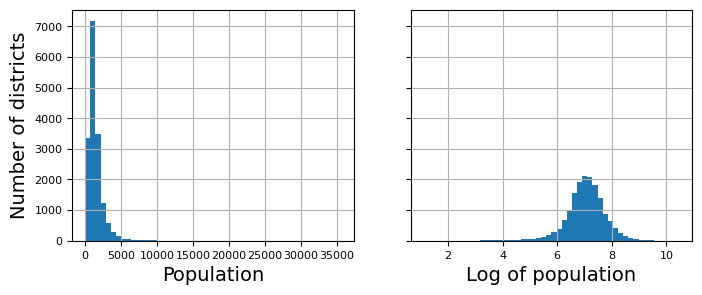

In [269]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

Another approach to handle heavy-tailed features consists in *bucketizing* the feature. This means chopping its distribution into roughly equal-sized
buckets, and replacing each feature value with the index of the bucket it belongs to. For example, you could replace each value with its percentile. Bucketizing with equal-sized buckets results in a feature with an almost uniform distribution, so there’s no need for further scaling, or you can just divide by the number of buckets to force the values to the 0–1 range.


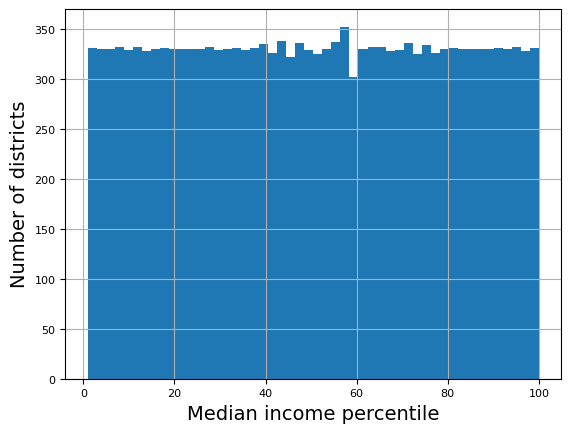

In [270]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

As for *multimodal distributions* like the housing median age, we can add a feature for each of the modes (at least the main ones), representing the similarity between the housing median age and that particular mode. The similarity measure is typically computed using a **radial basis function (RBF)**

In [273]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma = 0.1)

print(age_simil_35)

[[1.66155727e-03]
 [3.03539138e-04]
 [9.04837418e-01]
 ...
 [7.62186519e-12]
 [6.70320046e-01]
 [4.53999298e-05]]


The graph below shows the new feature as a function of the housing median age, for different values of gamma.

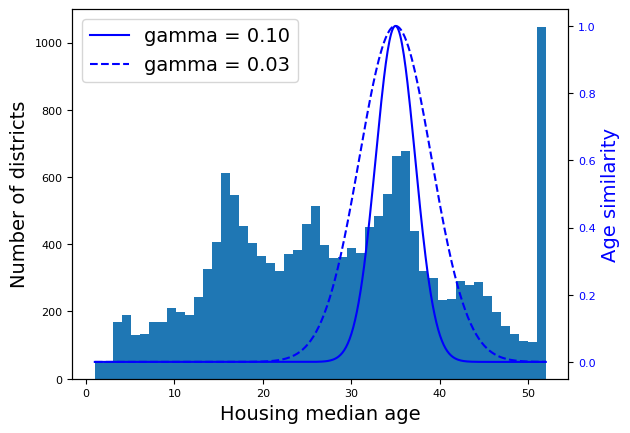

In [275]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

#### Scaling the Target

Sometimes you'll also need to scale the target variable (maybe it has a heavy-tail). In this case, our model will predict the transformed target variable, so we must not forget to revert the transformations to obtain the original scale.

Below is a simplified illustration: we standardize the target, then fit a **Linear Regression** model to it. The predicted values must be reverted (this is easily achievable with the ``inverse_transform()`` method)

In [252]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels =  target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # Pretend this is new data

scaled_pred = model.predict(some_new_data)
pred = target_scaler.inverse_transform(scaled_pred)
print(pred)

[[241486.33209105]
 [144477.87537938]
 [191955.6916771 ]
 [210539.59129834]
 [203947.18864869]]


This process is pipelined into a single class called ``TransformedTargetRegressor``.

In [253]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
pred = model.predict(some_new_data)
print(pred)

[241486.33209105 144477.87537938 191955.6916771  210539.59129834
 203947.18864869]


#### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom transformations, cleanup operations, or combining specific attributes.

For example, we can create a log-transformer (which deals with heavy-tailed variables) and apply it to the ``population`` feature:


In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

display(log_pop.head())

,population
15417,6.496775
1243,2.564949
4585,7.764721
6523,7.264730
4237,7.900637


The ``inverse_func`` is optional (required if we plan to use the transformer in a ``TransformedTargetRegressor``).

Below is an implementation of the ``age_simil_35`` feature we described earlier, using a custom transformer. 

In [286]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1)) # Notice the use of kwargs hyperparameters
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

print(age_simil_35)

[[1.66155727e-03]
 [3.03539138e-04]
 [9.04837418e-01]
 ...
 [7.62186519e-12]
 [6.70320046e-01]
 [4.53999298e-05]]


Note that ``rbf_kernel()`` does not treat the features separately. If you pass it an array with two features, it will measure the 2D distance (Euclidean) to measure similarity. For example, here’s how to add a feature that will measure the geographic similarity between each district and San
Francisco:

In [287]:

sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

print(sf_simil)

[[0.15949132]
 [0.41366269]
 [0.96895491]
 ...
 [0.04887606]
 [0.17651412]
 [0.99497109]]


Custom transformers are also useful to combine features. For example, here’s a ``FunctionTransformer`` that computes the ratio between the input features 0 and 1:

In [288]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
print(ratio_transformer.transform(np.array([[1., 2.], [3., 4.]])))

[[0.5 ]
 [0.75]]


If we want to create a transformer that is trainable, we can construct a class, and all it needs is three methods: ``fit()`` (which must return self), ``transform()``, and ``fit_transform()``.

You can get ``fit_transform()`` for free by simply adding ``TransformerMixin`` as a base class: the default implementation will just call ``fit()`` and then ``transform()``. If you add ``BaseEstimator`` as a base class (and avoid using ``*args`` and ``**kwargs`` in your constructor), you will also get two extra methods: ``get_params()`` and ``set_params()``. These will be useful for automatic hyperparameter tuning.


In [289]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

Here are a few things to note:
* The sklearn.utils.validation package contains several functions we can use to validate the inputs. Production code should have them.
* Scikit-Learn pipelines require the ``fit()`` method to have two arguments ``X`` and ``y``, which is why we need the ``y=None`` argument even though we don’t use ``y``.
* All Scikit-Learn estimators set ``n_features_in_`` in the ``fit()`` method, and they ensure that the data passed to ``transform()`` or ``predict()`` has this number of features. The ``fit()`` method must return ``self``.
* This implementation is not 100% complete: all estimators should set ``feature_names_in_`` in the ``fit()`` method when they are passed a DataFrame. Moreover, all transformers should provide a ``get_feature_names_out()`` method, as well as an ``inverse_transform()`` method when their ransformation can be reversed.


A custom transformer can (and often does) use other estimators in its implementation. For example, the following code demonstrates custom transformer that uses a KMeans clusterer in the ``fit()`` method to identify the main clusters in the training data, and then uses ``rbf_kernel()`` in the ``transform()`` method to measure how similar each sample is to each cluster center:

In [296]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
# To verify the validity of our custom estimator, pass an instance to the function is_estimator()

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
print(similarities[:3].round(2))

[[0.   0.12 0.   0.33 0.   0.01 0.   0.84 0.   0.01]
 [0.   0.   0.01 0.46 0.   0.39 0.   0.07 0.   0.  ]
 [0.39 0.   0.6  0.   0.   0.   0.81 0.   0.   0.  ]]


The graph below shows the 10 cluster centers found by k-means. The districts are colored according to their geographic similarity to their closest cluster center. Most clusters are located in highly populated and expensive areas.

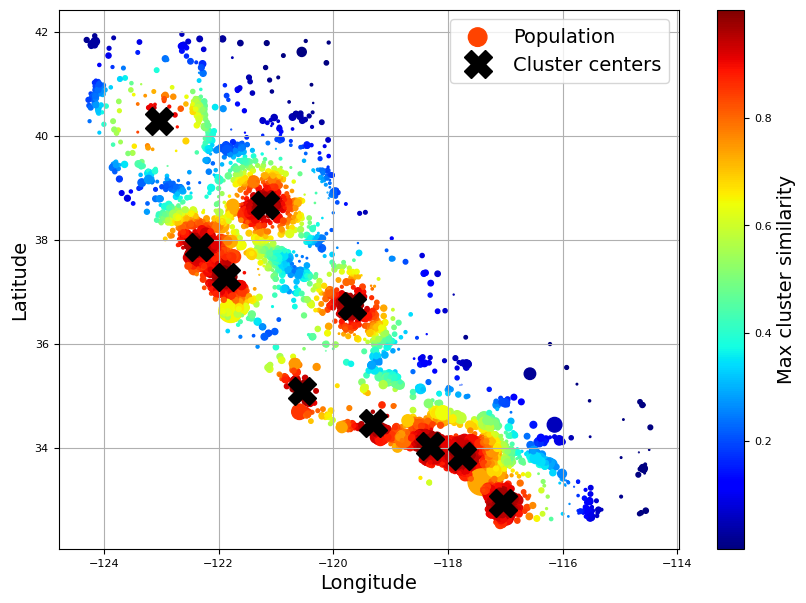

In [298]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

### Transformation Pipelines

We can group various data preparation steps into a single pipeline.

In [ ]:
# Run this cell to have interactive diagram outputs
from sklearn import set_config

set_config(display="diagram")

In [308]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), 
    ("standardize", StandardScaler())])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

Naming the components can be avoided using the ``make_pipeline()`` function:

In [309]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

All components except the last one are transformers. The last estimator can be anything. Calling ``fit()`` on the pipeline effectively calls ``fit_transform()`` on all the transformers until it reaches the final estimator, for which it only calls the ``fit()`` method. 

The pipeline exposes the same methods as the final estimator. In this example the last estimator is a ``StandardScaler``, which is a transformer, so the pipeline also acts like a transformer.

In [314]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15417,-0.079447,-0.554498,1.142546,-0.392088,-0.464933,-0.667178,-0.371775,0.434768
1243,-0.284391,0.115712,-0.208115,-1.174371,-1.252675,-1.233031,-1.278414,-0.786117
4585,-1.169149,1.118684,0.427490,0.509817,0.535075,0.806652,0.571131,-0.188592
6523,1.305174,-1.351252,-1.717679,0.032683,0.091675,-0.000342,0.187752,0.045293
4237,-1.264123,0.842164,-0.446467,1.004104,1.678951,1.105248,1.713497,-0.037675


Pipelines can be easily manipulated: 

In [331]:
print(f"The steps of the pipeline are:\n{num_pipeline.steps}\n")
print(f"The second component of the pipeline is: {num_pipeline[1]}\n")
print(f"The pipeline without the last component is:\n{num_pipeline[:-1]}\n")
print(f"Accessing a component of the pipeline via its name: simpleimputer = {num_pipeline.named_steps['simpleimputer']}")

# Setting parameters manually
num_pipeline.set_params(simpleimputer__strategy = "most_frequent")

The steps of the pipeline are:
[('simpleimputer', SimpleImputer(strategy='most_frequent')), ('standardscaler', StandardScaler())]

The second component of the pipeline is: StandardScaler()

The pipeline without the last component is:
Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent'))])

Accessing a component of the pipeline via its name: simpleimputer = SimpleImputer(strategy='most_frequent')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

Using pipelines, we can define a single transformer that handles the preprocessing of both numerical and categorical variables at once.

In [332]:
from sklearn.compose import ColumnTransformer


num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline.set_params(simpleimputer__strategy = "median") # revert previous cell's change

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

Similar to pipelines, column transformers have convenient functions available to automatize the process further.

In [336]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

housing_prepared = preprocessing.fit_transform(housing)

### Final Pipeline (Encompassing Every Step at Once)

## Annex 1. About stratification (Optional)

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The ``cdf()`` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [113]:
from scipy.stats import binom

sample_size = 1000
ratio_f = 0.511
p_small = binom(sample_size, ratio_f).cdf(485 - 1)
p_large = 1 - binom(sample_size, ratio_f).cdf(535)
print(f"p_total = {p_small + p_large}")

p_total = 0.10736798530929942


We can also get an estimate using simulation:

In [114]:
samples =  (np.random.rand(100_000, sample_size) < ratio_f).sum(axis = 1)
print(((samples < 485) | (samples > 535)).mean())

0.10789
